In [ ]:
#https://www.kaggle.com/bavalpreet26/coronavirus-analysis
#https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
#https://github.com/mashhadazam/datacookies/blob/master/CoronaVirus%20-%202019.ipynb

In [98]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython import display
from ipywidgets import interact, widgets

## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
#Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

#ConfirmedCases_raw=pd.read_csv('./time_series_19-covid-Confirmed.csv')

In [122]:
ConfirmedCases_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,39,46,64,64,73,103,103,186,231,271
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,65,65,92,112,134,171,210,267,307,353
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,21,21,36,49,57,71,94,121,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,20,20,35,46,61,68,78,94,144,184
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,3,3,5,7,7,7,33,35,37,51


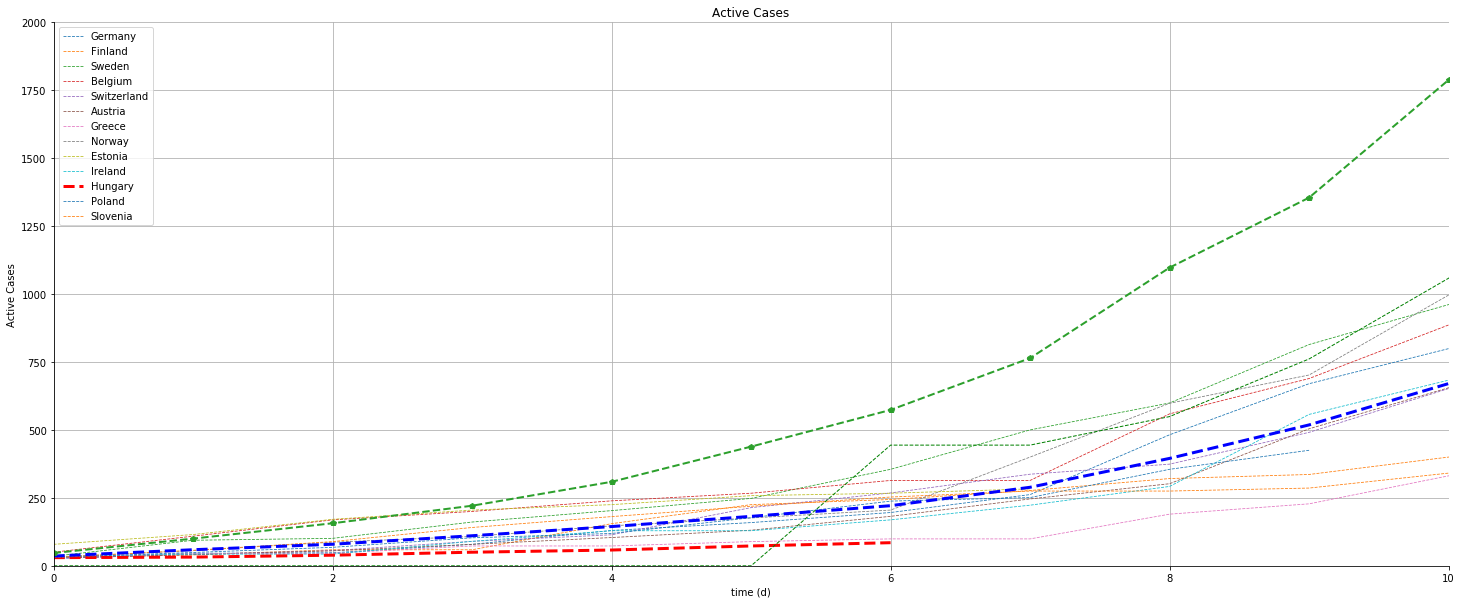

In [131]:
#cut-off for case num
case_num  = 25
days_after_cutoff = 25

best_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Austria|Greece|Hungary|Poland|Estonia|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Finland', case= False, regex= True)].T[4:]
worst_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Spain|Italy', case= False, regex= True)].T[4:]

hubei_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('China', case= False)].loc[154].T[4:]
hubei_case_country_data = np.pad(hubei_case_data, (6, 0), 'constant')


best_case_country_data = []
best_case_countries = []

for i in best_case_data.columns:
    #print(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_country_data.append(best_case_data[best_case_data[(best_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values)


worst_case_country_data = []
worst_case_countries = []

for i in worst_case_data.columns:
    #print(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    worst_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    worst_case_country_data.append(worst_case_data[worst_case_data[(worst_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values)

    


fig, ax = plt.subplots()

a = best_case_country_data[:days_after_cutoff]
best_mean_cases = [np.mean([x[i] for x in a if len(x) > i]) for i in range(days_after_cutoff)]

b = worst_case_country_data[:days_after_cutoff]
worst_mean_cases = [np.mean([x[i] for x in b if len(x) > i]) for i in range(days_after_cutoff)]


#ax.plot(ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Hungary|Poland|Estonia|Ireland|Luxemburg', case= False, regex= True)].T[4:])
k = 0


for i in best_case_country_data:
    
    if best_case_countries.index("Hungary") == k:
        ax.plot(i,'r--', linewidth=3.0)
        #dot = ax.plot(i.argmax(), i.max(), marker='o', markersize=6, color="green")
        #ax.annotate(str(int(i.max())) + " beteg a " + str(int(i.argmax())) + ". napon", xy=(i.argmax(), (i.max())),  xycoords='data',xytext=(0.7, 0.7), textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.02),horizontalalignment='right', verticalalignment='bottom')
    else:
        ax.plot(i[:days_after_cutoff], '--', linewidth=0.8)
    k = k+1

plt.legend(best_case_countries)
plt.rcParams['figure.figsize'] = [25, 10]

ax.plot(best_mean_cases, 'b--', linewidth=3.0)
ax.plot(worst_mean_cases, 'p--', linewidth=2.0)

ax.plot(hubei_case_country_data, 'g--', linewidth=1.0)

ax.set(xlabel='time (d)', ylabel='Active Cases', title='Active Cases')
ax.grid()

for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)

plt.axis([0, 10, 0, 2000])
    
fig.savefig("covid_21_03.png")
plt.show()


In [136]:
import datetime

dt = datetime.datetime(2020, 3, 16)
step = datetime.timedelta(seconds=86400)

for i in range(1,len(best_mean_cases[:-1])):
    date = dt.strftime('%Y-%m-%d')
    print(date+" : ",int(best_mean_cases[i]), "ICU: ~",int(0.05*best_mean_cases[i]),"-",int(0.25*best_mean_cases[i]))
    #print(str(i) + ":", int(100*best_mean_cases[i]/best_mean_cases[i-1])/100, int(best_mean_cases[i]))
    dt += step

2020-03-16 :  59 ICU: ~ 2 - 14
2020-03-17 :  79 ICU: ~ 3 - 19
2020-03-18 :  110 ICU: ~ 5 - 27
2020-03-19 :  144 ICU: ~ 7 - 36
2020-03-20 :  181 ICU: ~ 9 - 45
2020-03-21 :  221 ICU: ~ 11 - 55
2020-03-22 :  288 ICU: ~ 14 - 72
2020-03-23 :  395 ICU: ~ 19 - 98
2020-03-24 :  518 ICU: ~ 25 - 129
2020-03-25 :  670 ICU: ~ 33 - 167
2020-03-26 :  812 ICU: ~ 40 - 203
2020-03-27 :  1041 ICU: ~ 52 - 260
2020-03-28 :  1225 ICU: ~ 61 - 306
2020-03-29 :  1529 ICU: ~ 76 - 382
2020-03-30 :  1718 ICU: ~ 85 - 429
2020-03-31 :  2429 ICU: ~ 121 - 607
2020-04-01 :  3175 ICU: ~ 158 - 793
2020-04-02 :  4935 ICU: ~ 246 - 1233
2020-04-03 :  6283 ICU: ~ 314 - 1570
2020-04-04 :  9257 ICU: ~ 462 - 2314
2020-04-05 :  12327 ICU: ~ 616 - 3081
2020-04-06 :  15320 ICU: ~ 766 - 3830
2020-04-07 :  19848 ICU: ~ 992 - 4962


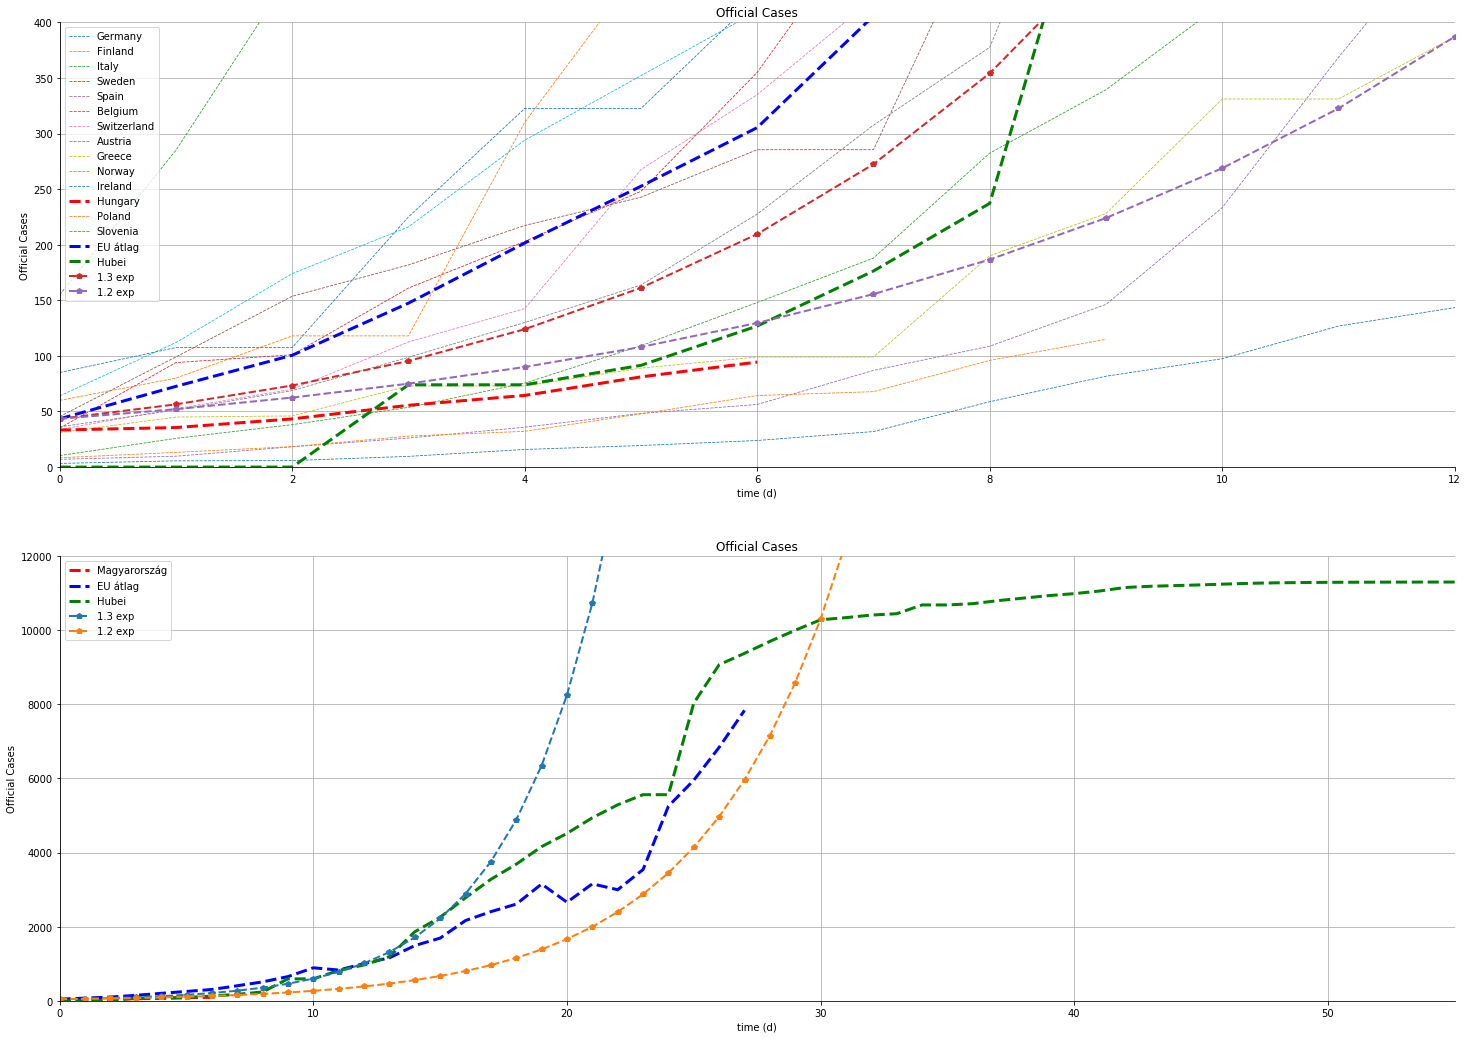

In [128]:
# load population dataset
pop_clean_data = pd.read_csv("./population_clean.csv")

# select only the latest data
pop = pop_clean_data.loc[:, ['Country Name', '2018']]

# replace country names 
name = {
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'Macao SAR, China': 'Macau',
    'Hong Kong SAR': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'Republic of Korea',
    'United Kingdom': 'UK',
    'United States': 'US' }
pop.loc[:, 'Country Name'] = pop.loc[: 'Country Name'].replace(name)

pop[pop['Country Name'].str.contains('Spain|Italy|Austria|Greece|Hungary|Poland|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Finland|Ireland', case=False, regex=True)]

def normalizebypop(country):
    global pop
    return int(pop[pop['Country Name'].str.contains(country, case=False, regex=True)]["2018"].values[0]/1000000)

#print(normalizebypop("Hungary"))

#cut-off for case num
case_num  = 25
days_after_cutoff = 55

best_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('Spain|Italy|Austria|Greece|Hungary|Poland|Ireland|Luxemburg|Germany|Norway|Switzerland|Sweden|Slovenia|Belgium|Finland|Ireland', case= False, regex= True)].T[4:]

hubei_case_data = ConfirmedCases_raw[ConfirmedCases_raw["Country/Region"].str.contains('China', case= False)].loc[154].T[4:]


hubei_case_country_data = np.pad(hubei_case_data, (3, 0), 'constant')/6

best_case_country_data = []
best_case_countries = []

for i in best_case_data.columns:
    country = ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0]
    best_case_countries.append(ConfirmedCases_raw[ConfirmedCases_raw.index == i]["Country/Region"].values[0])
    best_case_country_data.append(10*best_case_data[best_case_data[(best_case_data[i] > case_num)].index[0]:][i].reset_index(drop=True).values/normalizebypop(country))

#fig, ax = plt.subplots()

fig2, (ax1, ax2) = plt.subplots(2, 1, sharex=False)


a = best_case_country_data[:days_after_cutoff]
best_mean_cases = [np.mean([x[i] for x in a if len(x) > i]) for i in range(days_after_cutoff)]

k = 0

for i in best_case_country_data:
    
    if best_case_countries.index("Hungary") == k:
        ax1.plot(i,'r--', linewidth=3.0)
        ax2.plot(i,'r--', linewidth=3.0)
        #dot = ax.plot(i.argmax(), i.max(), marker='o', markersize=6, color="green")
        #ax.annotate(str(int(i.max())) + " beteg a " + str(int(i.argmax())) + ". napon", xy=(i.argmax(), (i.max())),  xycoords='data',xytext=(0.7, 0.7), textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.02),horizontalalignment='right', verticalalignment='bottom')
    else:
        ax1.plot(i[:days_after_cutoff], '--', linewidth=0.8)
        #ax2.plot(i[:days_after_cutoff], '--', linewidth=0.8)
    k = k + 1


# plotting average cases
ax1.plot(best_mean_cases, 'b--', linewidth=3.0)
ax1.plot(hubei_case_country_data, 'g--', linewidth=3.0)

ax2.plot(best_mean_cases, 'b--', linewidth=3.0)
ax2.plot(hubei_case_country_data, 'g--', linewidth=3.0)

#plotting a curve with R.1.3
r13_curve = []
r14_curve = []
r12_curve = []
for i in range(0,len(best_mean_cases)):
    if i == 0:
        r13_curve.append(best_mean_cases[0])
        r14_curve.append(best_mean_cases[0])
        r12_curve.append(best_mean_cases[0])

    else:
        r13_curve.append(1.3*r13_curve[-1])
        r12_curve.append(1.2*r12_curve[-1])
        r14_curve.append(1.4*r14_curve[-1])

#ax.plot(r14_curve, 'p--', linewidth=3.0)
ax1.plot(r13_curve, 'p--', linewidth=2.0)
ax1.plot(r12_curve, 'p--', linewidth=2.0, label='Inline label')


ax2.plot(r13_curve, 'p--', linewidth=2.0)
ax2.plot(r12_curve, 'p--', linewidth=2.0)

add = ["EU átlag","Hubei","1.3 exp","1.2 exp"]
legendlist = best_case_countries + add


ax1.legend(legendlist)
ax2.legend(['Magyarország','EU átlag','Hubei','1.3 exp','1.2 exp'])

ax1.set(xlabel='time (d)', ylabel='Official Cases', title='Official Cases')
ax1.grid()
ax2.set(xlabel='time (d)', ylabel='Official Cases', title='Official Cases')
ax2.grid()



for spine in ('top', 'right'):
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

plt.rcParams['figure.figsize'] = [25, 18]
ax1.axis([0, 12, 0, 400])
ax2.axis([0, 55, 0, 12000])


fig2.savefig("covid_19_03_norm_hub.png")

plt.show()

In [140]:
import datetime

dt = datetime.datetime(2020, 3, 16)
step = datetime.timedelta(seconds=86400)

for i in range(1,len(best_mean_cases[:-1])):
    date = dt.strftime('%Y-%m-%d')
    print(date+" : ",int(best_mean_cases[i]), "ICU: ~",int(0.05*best_mean_cases[i]),"-",int(0.25*best_mean_cases[i]))
    #print(str(i) + ":", int(100*best_mean_cases[i]/best_mean_cases[i-1])/100, int(best_mean_cases[i]))
    dt += step



2020-03-16 :  59 ICU: ~ 2 - 14
2020-03-17 :  79 ICU: ~ 3 - 19
2020-03-18 :  110 ICU: ~ 5 - 27
2020-03-19 :  144 ICU: ~ 7 - 36
2020-03-20 :  181 ICU: ~ 9 - 45
2020-03-21 :  221 ICU: ~ 11 - 55
2020-03-22 :  288 ICU: ~ 14 - 72
2020-03-23 :  395 ICU: ~ 19 - 98
2020-03-24 :  518 ICU: ~ 25 - 129
2020-03-25 :  670 ICU: ~ 33 - 167
2020-03-26 :  812 ICU: ~ 40 - 203
2020-03-27 :  1041 ICU: ~ 52 - 260
2020-03-28 :  1225 ICU: ~ 61 - 306
2020-03-29 :  1529 ICU: ~ 76 - 382
2020-03-30 :  1718 ICU: ~ 85 - 429
2020-03-31 :  2429 ICU: ~ 121 - 607
2020-04-01 :  3175 ICU: ~ 158 - 793
2020-04-02 :  4935 ICU: ~ 246 - 1233
2020-04-03 :  6283 ICU: ~ 314 - 1570
2020-04-04 :  9257 ICU: ~ 462 - 2314
2020-04-05 :  12327 ICU: ~ 616 - 3081
2020-04-06 :  15320 ICU: ~ 766 - 3830
2020-04-07 :  19848 ICU: ~ 992 - 4962


[-3.83464896e-15  1.00000000e+00  2.30780075e+04] [[ 5.34067755e-27 -4.58533716e-21 -1.26847863e-12]
 [-4.58533716e-21  3.93700058e-15  1.08901133e-06]
 [-1.26847863e-12  1.08901133e-06  2.75113926e+23]]


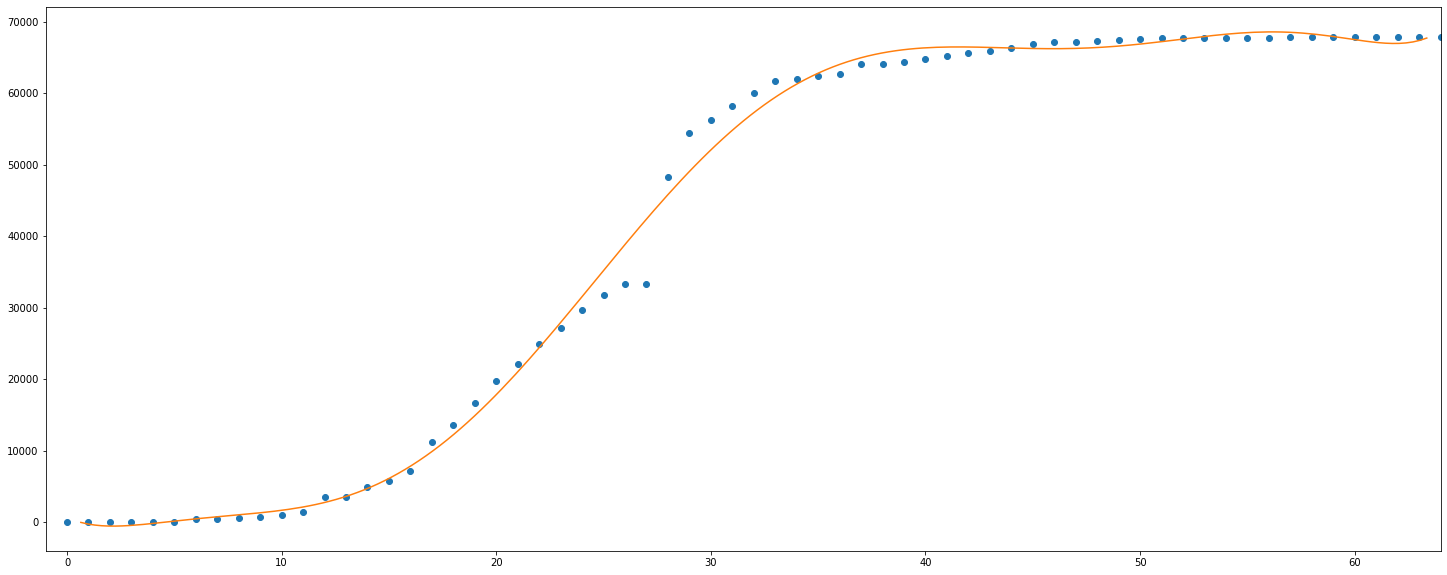

In [144]:
from scipy.optimize import curve_fit

y= []

for i in hubei_case_country_data:
    y.append(int(i))

x =  list(range(0,len(y)))

# Define first exponential function
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# Get parameters estimate
popt, pcov = curve_fit(func, x, hubei_case_country_data)

print(popt,pcov)

# calculate polynomial
z = np.polyfit(x, y, 9)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 200)
y_new = f(x_new)

plt.plot(x,y,'o', x_new[2:-2], y_new[2:-2])
plt.xlim([x[0]-1, x[-1] ])
plt.show()

#print(x_new)
